In [29]:
from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage.morphology import ball

def plot_3d(image_normal, image_closed, threshold=-300):
    """Code adapted from Saeed Alahmari
    available at https://www.kaggle.com/saeed3/lung-segmentation"""
    
    # Position the scan upright, 
    # so the head of the patient would be at the top facing the camera
    #pip = np.transpose(image_normal,(0,2,-1))
    pi_normal=np.moveaxis(image_normal, 1, -1)
    p_normal=np.moveaxis(pi_normal, 2, 1)
    
    pi_closed=np.moveaxis(image_closed, 1, -1)
    p_closed=np.moveaxis(pi_closed, 2, 1)
    
    verts_normal, faces_normal = measure.marching_cubes_classic(p_normal, threshold)
    verts_closed, faces_closed = measure.marching_cubes_classic(p_closed, threshold)

    #Normal
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(121, projection='3d')

    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh_normal = Poly3DCollection(verts_normal[faces_normal], alpha=0.70)
    face_color = [0.45, 0.45, 0.75]
    mesh_normal.set_facecolor(face_color)
    ax.add_collection3d(mesh_normal)

    ax.set_xlim(0, p_normal.shape[0])
    ax.set_ylim(0, p_normal.shape[1])
    ax.set_zlim(0, p_normal.shape[2])
    ax.set_title("Results")
    #ax.axis('off')
    
    #Closed
    ax_closed = fig.add_subplot(122, projection='3d')
    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh_closed = Poly3DCollection(verts_closed[faces_closed], alpha=0.70)
    face_color = [0.45, 0.45, 0.75]
    mesh_closed.set_facecolor(face_color)
    ax_closed.add_collection3d(mesh_closed)

    ax_closed.set_xlim(0, p_closed.shape[0])
    ax_closed.set_ylim(0, p_closed.shape[1])
    ax_closed.set_zlim(0, p_closed.shape[2])
    ax_closed.set_title("Results with Closing Operation")
    #ax_closed.axis('off')
    
    plt.show()

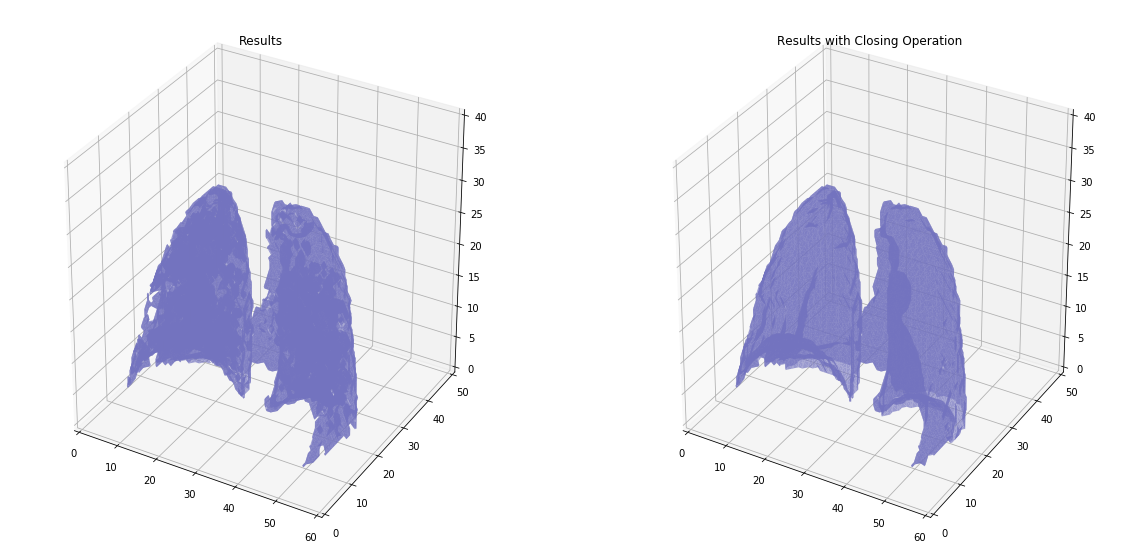

In [30]:
seg = np.load("G:/Results/segmentation_results/Iterative/third/3DVolumeSegmented_40433190_left_225.npy")
seg_2 = np.load("G:/Results/segmentation_results/Iterative/third/3DVolumeSegmented_40433190_right_225.npy")
lungs = seg +seg_2
new_lungs=np.transpose(lungs,(2, 1, 0))
new_flipped = np.flip(new_lungs,2)

closed =skimage.morphology.closing(new_flipped,ball(3))
plot_3d(new_flipped[20:80,30:80,0:40], closed[20:80,30:80,0:40], 0.75)
    
#plot_3d(new_new[20:80,30:80,0:40], 0.75)
# plot_3d(closed[20:80,30:80,0:40], 0.75)

In [ ]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data=[go.Surface(z=new_new)])
fig.show()